In [93]:
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/aliciahackett/Downloads/task_data.csv')

df.head()


,taskDesc,energyBefore,energyAfter,PainLevel,symptoms,SleepOK,EatOK,DrinkOK,Weather,timestamp
0,Write my report,3,1,7,demotivated;slow,False,False,False,Warm,2025-06-09T10:09:41.570Z
1,write my report,6,5,7,light headed;sick,True,False,False,Cool,2025-06-09T10:47:57.178Z
2,write my report,5,5,6,intermittent arm pain;fed up,True,False,True,Cool,2025-06-09T11:22:40.266Z
3,eat lunch,5,2,3,tired,True,True,False,Cool,2025-06-09T12:19:05.857Z
4,nap,1,7,4,NaN,True,True,False,Cool,2025-06-09T13:45:39.113Z


In [94]:
Average_Pain = df['PainLevel'].mean()
print(f"The average pain level is: {Average_Pain}")

The average pain level is: 5.5


In [95]:
energyChange = df['energyBefore'] - df['energyAfter']

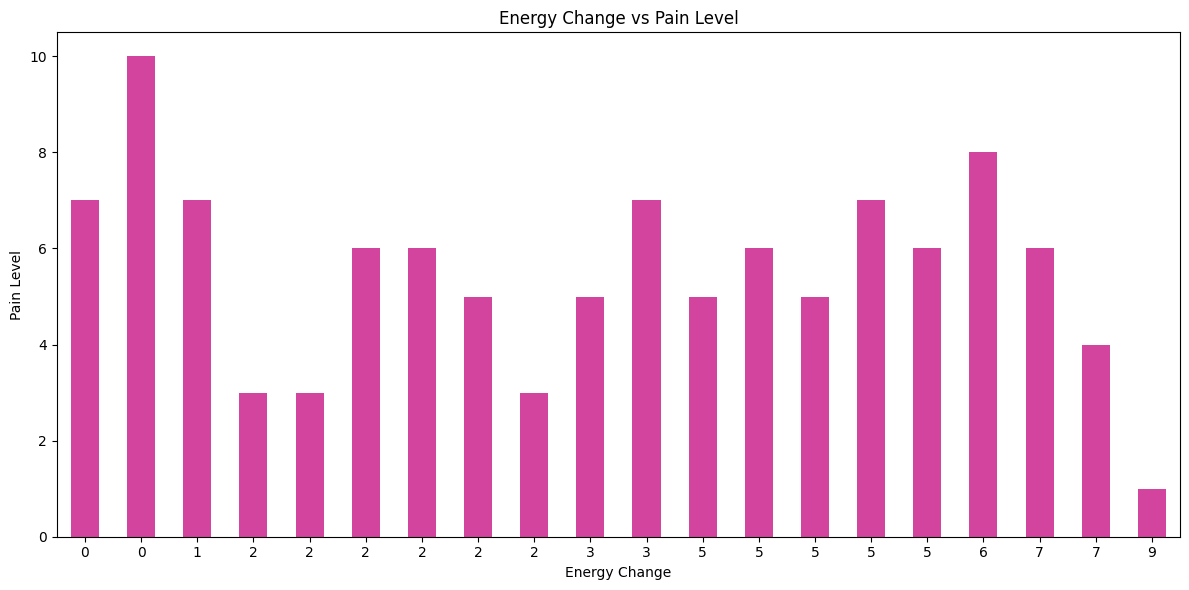

In [144]:
df['energyChange'] = df['energyBefore'] - df['energyAfter']

df_sorted = df.sort_values(by='energyAfter', ascending=True)

df_sorted.plot(
    kind='bar',
    color='mediumvioletred', alpha=0.8,
    x='energyAfter',
    y='PainLevel',
    title='Energy Change vs Pain Level',
    ylabel='Pain Level',
    xlabel='Energy Change',
    figsize=(12, 6),
    legend=False
)

plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()


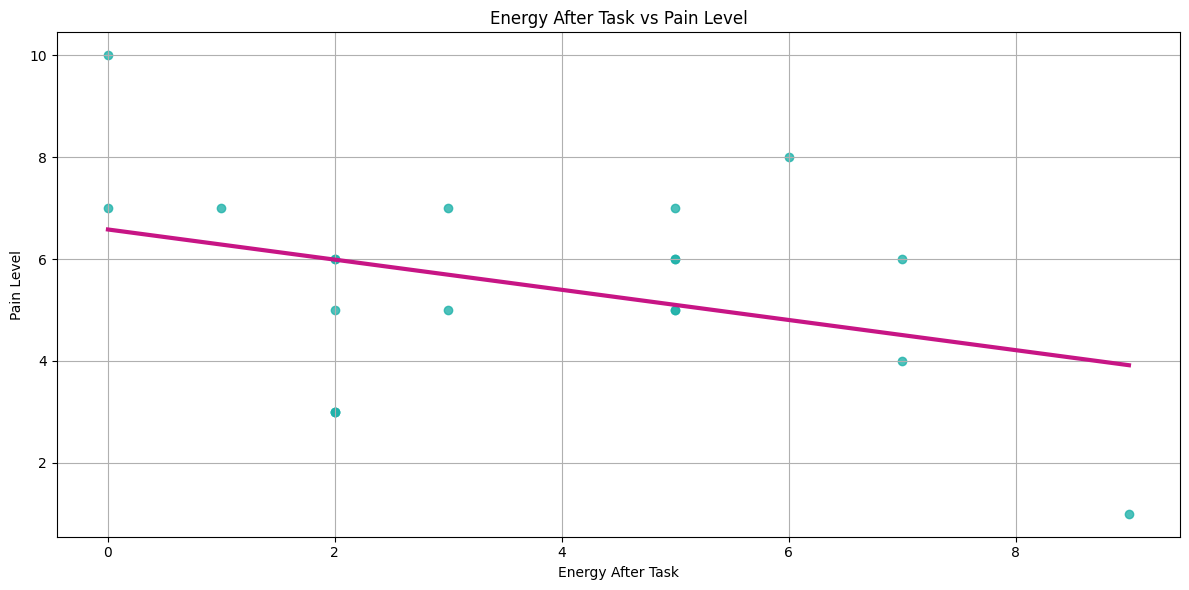

In [136]:

df['energyChange'] = df['energyBefore'] - df['energyAfter']


df_sorted = df.sort_values(by='energyAfter', ascending=True)


plt.figure(figsize=(12, 6))
sns.regplot(
    data=df_sorted,
    x='energyAfter',
    y='PainLevel',
    ci=None,
    line_kws={'color': 'mediumvioletred', 'linewidth': 3},
    scatter_kws={'color': 'lightseagreen'}
)

plt.title('Energy After Task vs Pain Level')
plt.xlabel('Energy After Task')
plt.ylabel('Pain Level')
plt.grid(True)
plt.tight_layout()
plt.show()


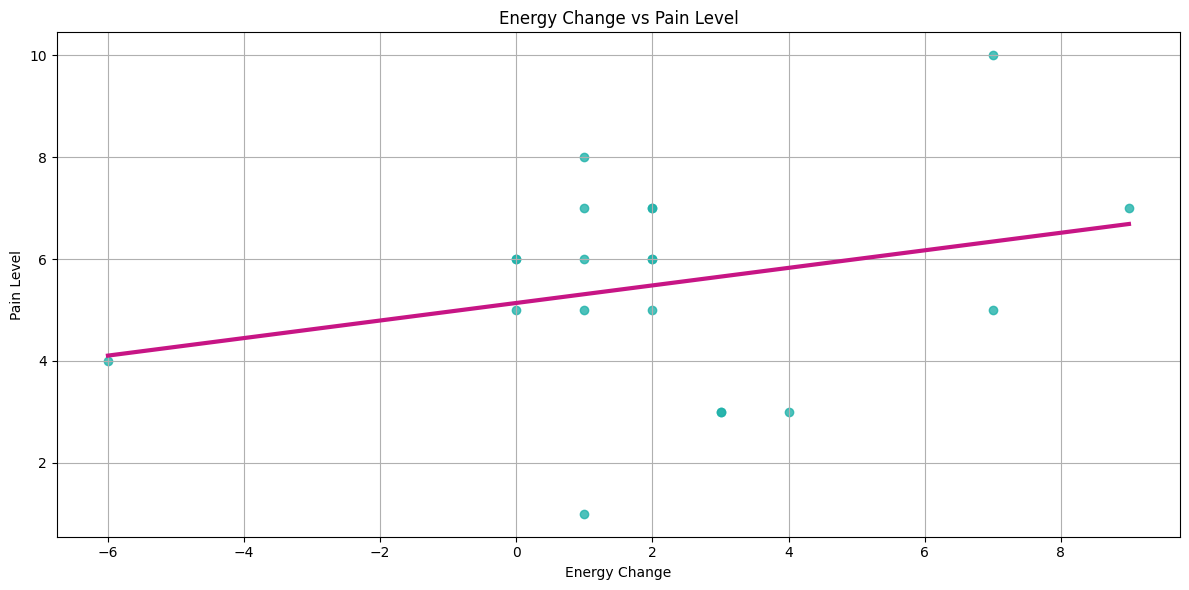

In [162]:
df['energyChange'] = df['energyBefore'] - df['energyAfter']

df_sorted = df.sort_values(by='energyChange', ascending=True)

plt.figure(figsize=(12, 6))
sns.regplot(
    data=df_sorted,
    x='energyChange',
    y='PainLevel',
    ci=None,
    line_kws={'color': 'mediumvioletred', 'linewidth': 3},
    scatter_kws={'color': 'lightseagreen'}
)

plt.title('Energy Change vs Pain Level')
plt.xlabel('Energy Change')
plt.ylabel('Pain Level')
plt.grid(True)
plt.tight_layout()
plt.show()


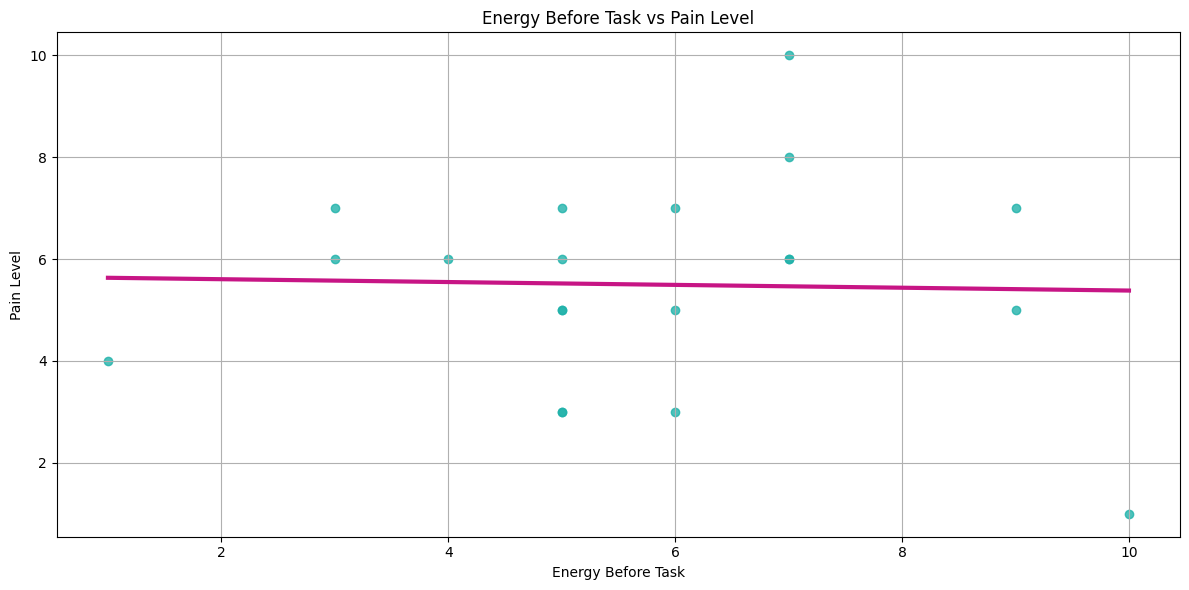

In [139]:
df['energyChange'] = df['energyBefore'] - df['energyAfter']

df_sorted = df.sort_values(by='energyBefore', ascending=True)

plt.figure(figsize=(12, 6))
sns.regplot(
    data=df_sorted,
    x='energyBefore',
    y='PainLevel',
    ci=None,
    line_kws={'color': 'mediumvioletred', 'linewidth': 3},
    scatter_kws={'color': 'lightseagreen'}
)

plt.title('Energy Before Task vs Pain Level')
plt.xlabel('Energy Before Task')
plt.ylabel('Pain Level')
plt.grid(True)
plt.tight_layout()
plt.show()


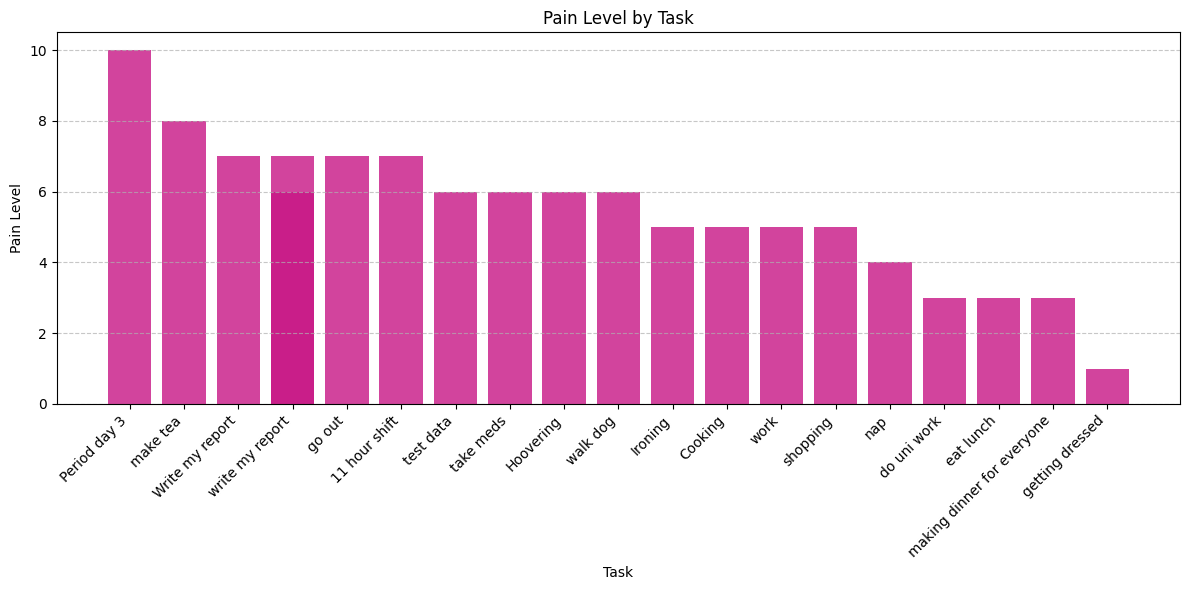

In [142]:
df_sorted = df.sort_values(by='PainLevel', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df_sorted['taskDesc'], df_sorted['PainLevel'], color='mediumvioletred', alpha=0.8)


plt.title('Pain Level by Task')
plt.xlabel('Task')
plt.ylabel('Pain Level')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [101]:
df['symptoms'].describe()

count                   11
unique                  11
top       demotivated;slow
freq                     1
Name: symptoms, dtype: object

/var/folders/12/lxmmd68n4hz5wxhb457vtp_m0000gn/T/ipykernel_5121/1377992161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['symptoms'] = df_clean['symptoms'].apply(lambda x: [s.strip() for s in x.split(';')])
/var/folders/12/lxmmd68n4hz5wxhb457vtp_m0000gn/T/ipykernel_5121/1377992161.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


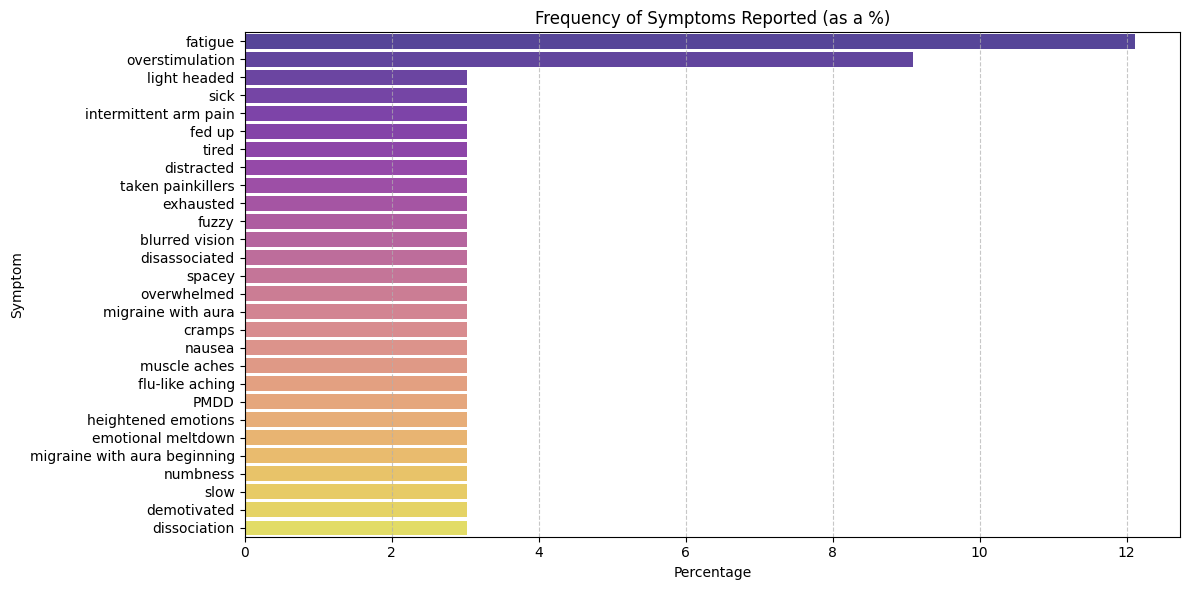

In [169]:

# Drop rows with NaN symptoms and split symptoms
df_clean = df.dropna(subset=['symptoms'])
df_clean['symptoms'] = df_clean['symptoms'].apply(lambda x: [s.strip() for s in x.split(';')])
all_symptoms = [symptom for sublist in df_clean['symptoms'] for symptom in sublist]

# Get percentages
symptom_percentages = pd.Series(all_symptoms).value_counts(normalize=True) * 100
symptom_percentages = symptom_percentages.sort_values(ascending=False)

# Plot graph
plt.figure(figsize=(12, 6))
sns.barplot(
    y=symptom_percentages.index,
    x=symptom_percentages.values,
    palette='plasma',  
    alpha=0.8
)
plt.title('Frequency of Symptoms Reported (as a %)')
plt.xlabel('Percentage')
plt.ylabel('Symptom')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:

# make it one row per symptom
df_exploded = df_clean.explode('symptoms')

# Group by symptom and calculate average energy and pain levels
symptom_stats = df_exploded.groupby('symptoms')[['energyBefore', 'energyAfter', 'PainLevel']].mean().reset_index()


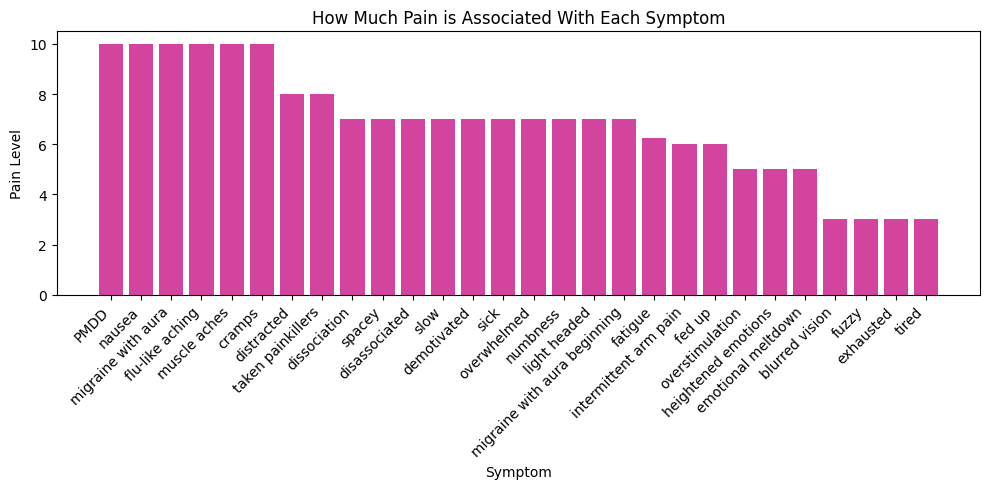

In [156]:

symptom_stats_sorted = symptom_stats.sort_values(by='PainLevel', ascending=False)


plt.figure(figsize=(10, 5))
plt.bar(symptom_stats_sorted['symptoms'], symptom_stats_sorted['PainLevel'], color='mediumvioletred', alpha=0.8)
plt.title('How Much Pain is Associated With Each Symptom')
plt.ylabel('Pain Level')
plt.xlabel('Symptom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


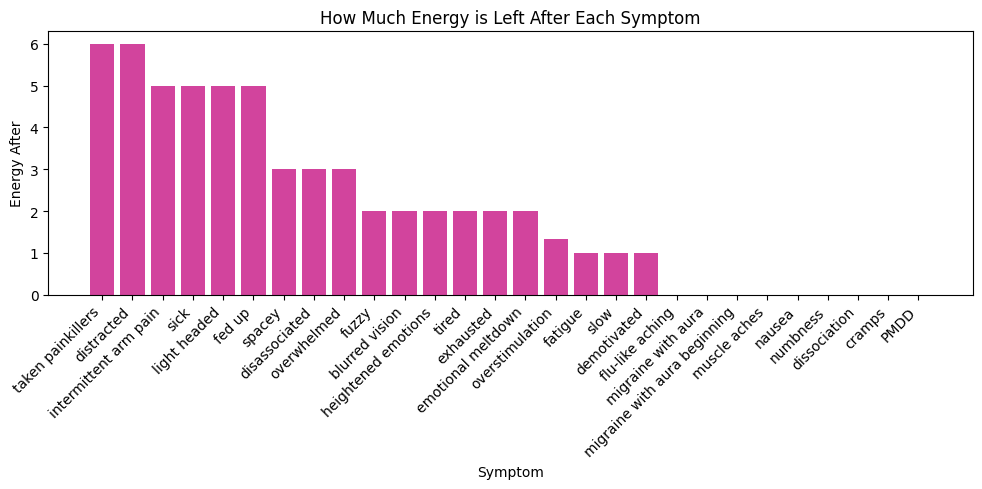

In [157]:
# Sort symptoms by energyAfter descending
symptom_energy_sorted = symptom_stats.sort_values(by='energyAfter', ascending=False)

# Plot the sorted data
plt.figure(figsize=(10, 5))
plt.bar(symptom_energy_sorted['symptoms'], symptom_energy_sorted['energyAfter'], color='mediumvioletred', alpha=0.8)
plt.title('How Much Energy is Left After Each Symptom')
plt.ylabel('Energy After')
plt.xlabel('Symptom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


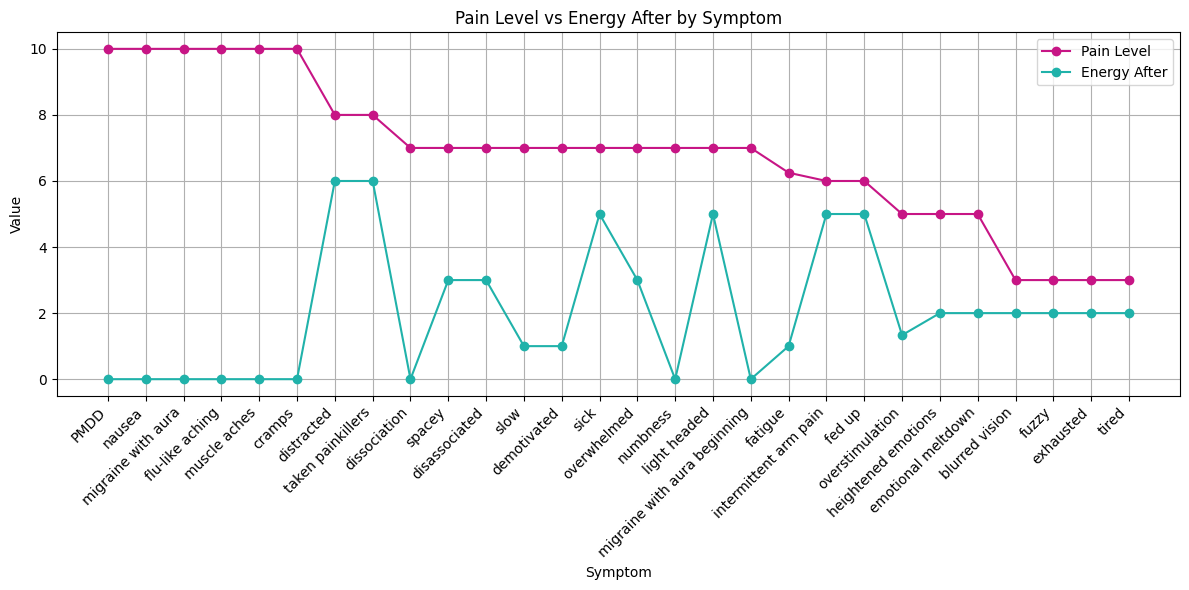

In [158]:
import matplotlib.pyplot as plt

# Sort symptoms by pain level for clarity
symptom_sorted = symptom_stats.sort_values(by='PainLevel', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))

# Line for PainLevel
plt.plot(symptom_sorted['symptoms'], symptom_sorted['PainLevel'], marker='o', label='Pain Level', color='mediumvioletred')

# Line for Energy After
plt.plot(symptom_sorted['symptoms'], symptom_sorted['energyAfter'], marker='o', label='Energy After', color='lightseagreen')

# Titles and labels
plt.title('Pain Level vs Energy After by Symptom')
plt.xlabel('Symptom')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


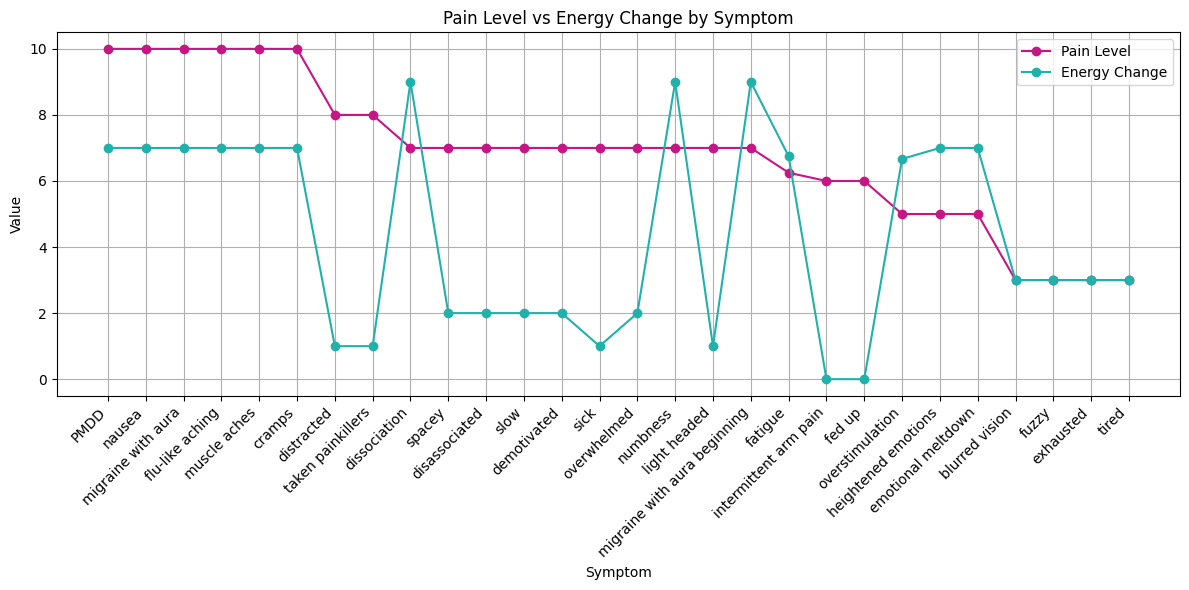

In [159]:
import matplotlib.pyplot as plt

# Calculate energy change
symptom_stats['energyChange'] = symptom_stats['energyBefore'] - symptom_stats['energyAfter']

# Sort by pain level for clearer comparison
symptom_sorted = symptom_stats.sort_values(by='PainLevel', ascending=False)

# Plot
plt.figure(figsize=(12, 6))

# Line for Pain Level
plt.plot(symptom_sorted['symptoms'], symptom_sorted['PainLevel'], marker='o', label='Pain Level', color='mediumvioletred')

# Line for Energy Change
plt.plot(symptom_sorted['symptoms'], symptom_sorted['energyChange'], marker='o', label='Energy Change', color='lightseagreen')

# Titles and formatting
plt.title('Pain Level vs Energy Change by Symptom')
plt.xlabel('Symptom')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


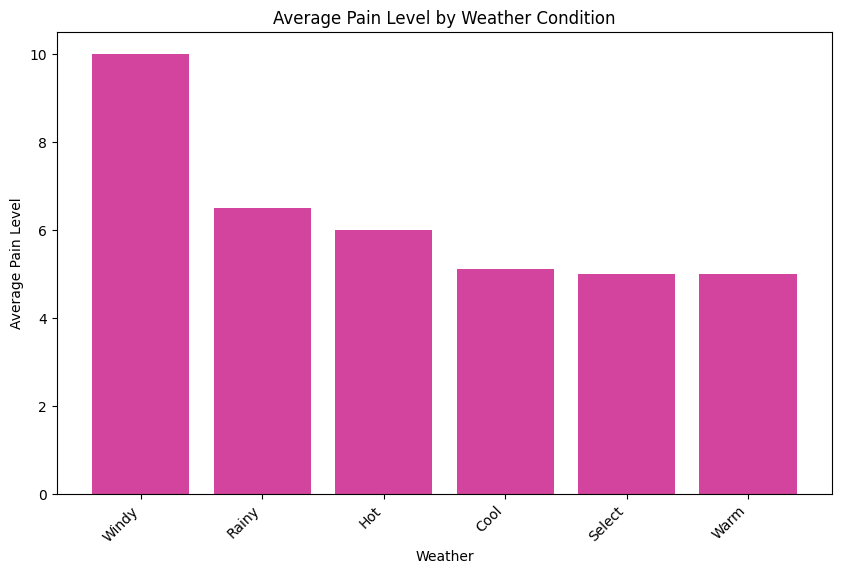

In [160]:

# Group by weather and calculate the mean pain level for each weather condition
weather_stats = df.groupby('Weather')['PainLevel'].mean().reset_index()

# Sort by pain level for better visualization
weather_stats = weather_stats.sort_values(by='PainLevel', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(weather_stats['Weather'], weather_stats['PainLevel'], color='mediumvioletred', alpha=0.8)

# the chart
plt.title('Average Pain Level by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Average Pain Level')
plt.xticks(rotation=45, ha='right')
plt.show()

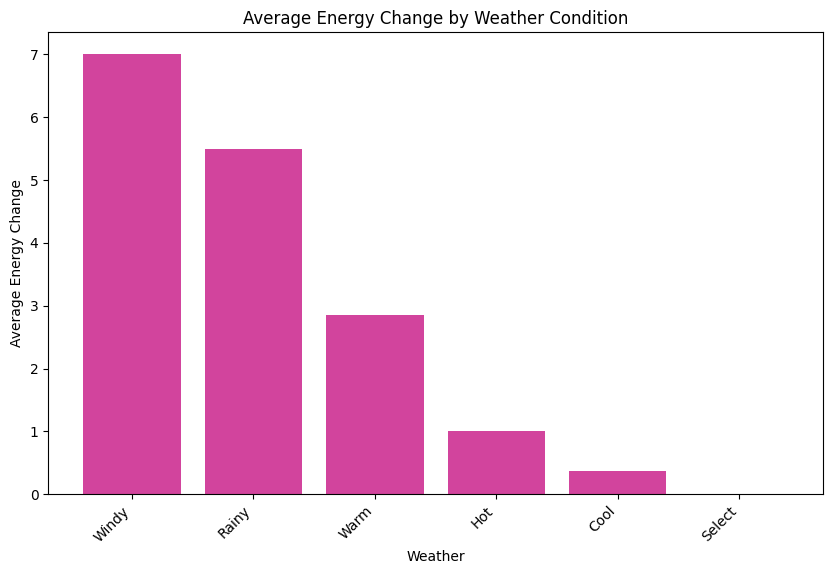

In [161]:
# Energy CHange calcuklation to keep everything together 
df['energyChange'] = df['energyBefore'] - df['energyAfter']

# Group by Weather and calculate the mean energy change for each weather condition
weather_energy = df.groupby('Weather')['energyChange'].mean().reset_index()

# make it high to low
weather_energy = weather_energy.sort_values(by='energyChange', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(weather_energy['Weather'], weather_energy['energyChange'], color='mediumvioletred', alpha=0.8)

# The chart
plt.title('Average Energy Change by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Average Energy Change')
plt.xticks(rotation=45, ha='right')
plt.show()


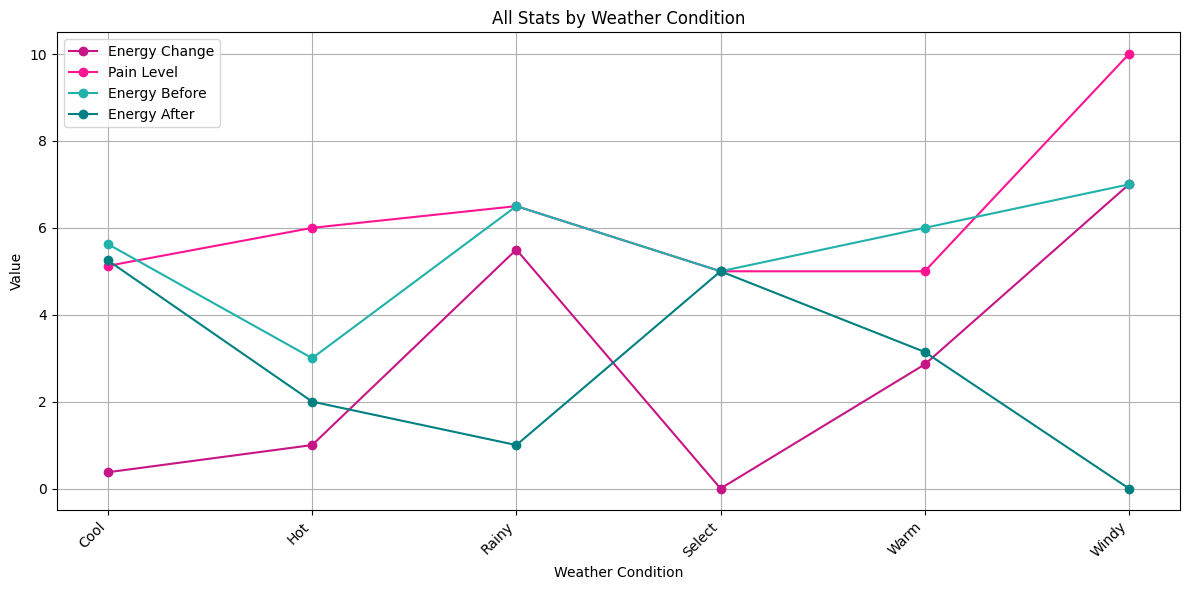

In [182]:
import matplotlib.pyplot as plt

df['energyChange'] = df['energyBefore'] - df['energyAfter']

# Group by Weather and calculate the mean energy change for each weather condition
weather_energy = df.groupby('Weather')['energyChange'].mean().reset_index()
weather_pain = df.groupby('Weather')['PainLevel'].mean().reset_index()
weather_energybefore = df.groupby('Weather')['energyBefore'].mean().reset_index()
weather_energyafter = df.groupby('Weather')['energyAfter'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(weather_energy['Weather'], weather_energy['energyChange'], marker='o', label='Energy Change', color='mediumvioletred')
plt.plot(weather_pain['Weather'], weather_pain['PainLevel'], marker='o', label='Pain Level', color='deeppink')
plt.plot(weather_energybefore['Weather'], weather_energybefore['energyBefore'], marker='o', label='Energy Before', color='lightseagreen')
plt.plot(weather_energyafter['Weather'], weather_energyafter['energyAfter'], marker='o', label='Energy After', color='teal')
plt.title('All Stats by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
